In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV



        

**1.DATA GATHERING**
    **(Loading Files into dataframes)**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Clean_Dataset.csv')
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


**2.DATA PREPROCESSING**
    **(DATA CLEANSING)**


In [4]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df = df.drop_duplicates()

**2.EXPLORATORY DATA ANALYSIS**

***2.1 HANDLING MISSING VALUES***

In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [9]:
df.isna().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


***2.2 DATA VISUALIZATION***

***2.2 (A) UNIVARIATE ANALYSIS***

In [13]:
Uniq_Airline = df.airline.unique()
Uniq_Airline

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [14]:
flights_Code = df.flight.value_counts().head(20).sort_values(ascending=False)

In [15]:
flight_Count = df.groupby(['flight','airline'],as_index=False).count()

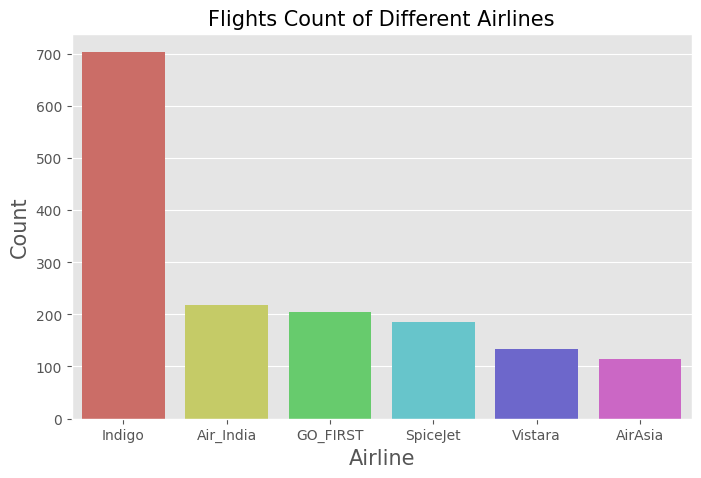

In [16]:
airline_counts = flight_Count['airline'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

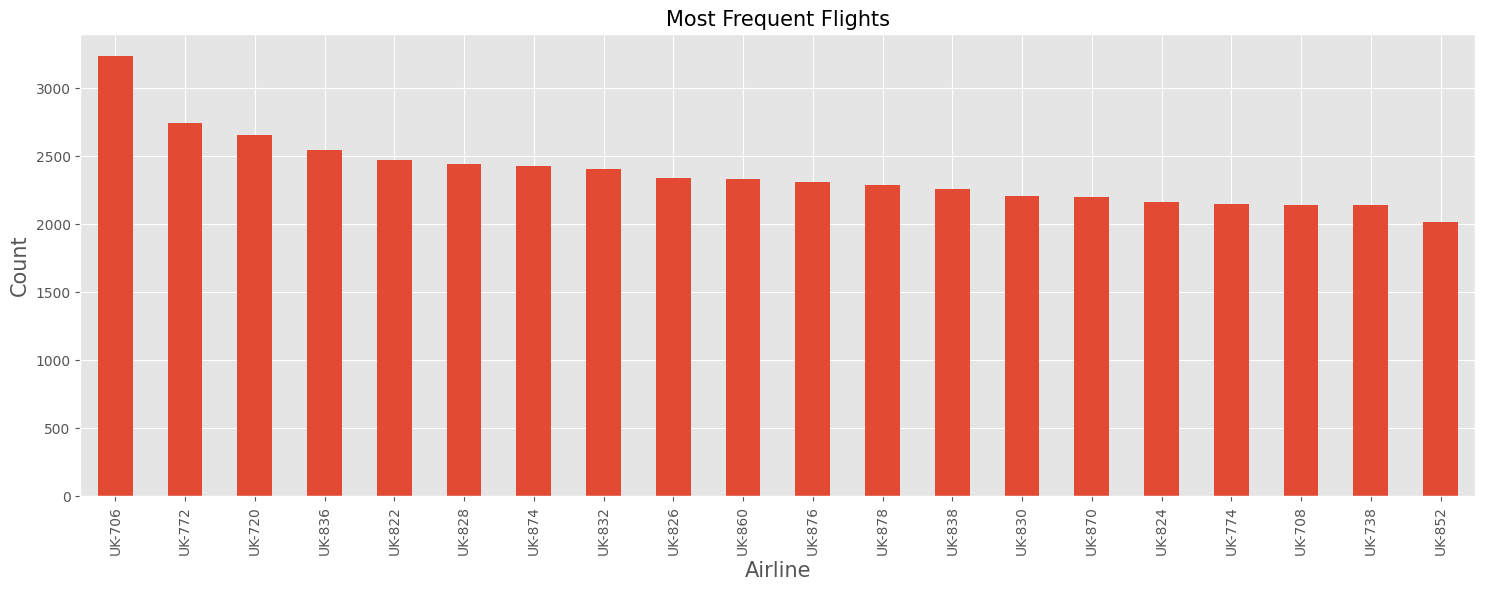

In [17]:
plt.figure(figsize=(18,6))
flights_Code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

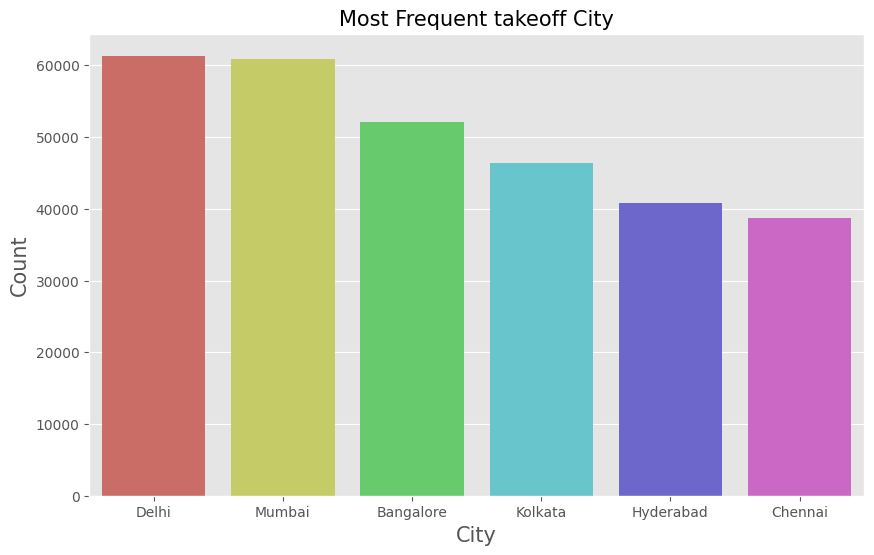

In [18]:
city_counts = df['source_city'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='hls')
plt.title('Most Frequent takeoff City',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

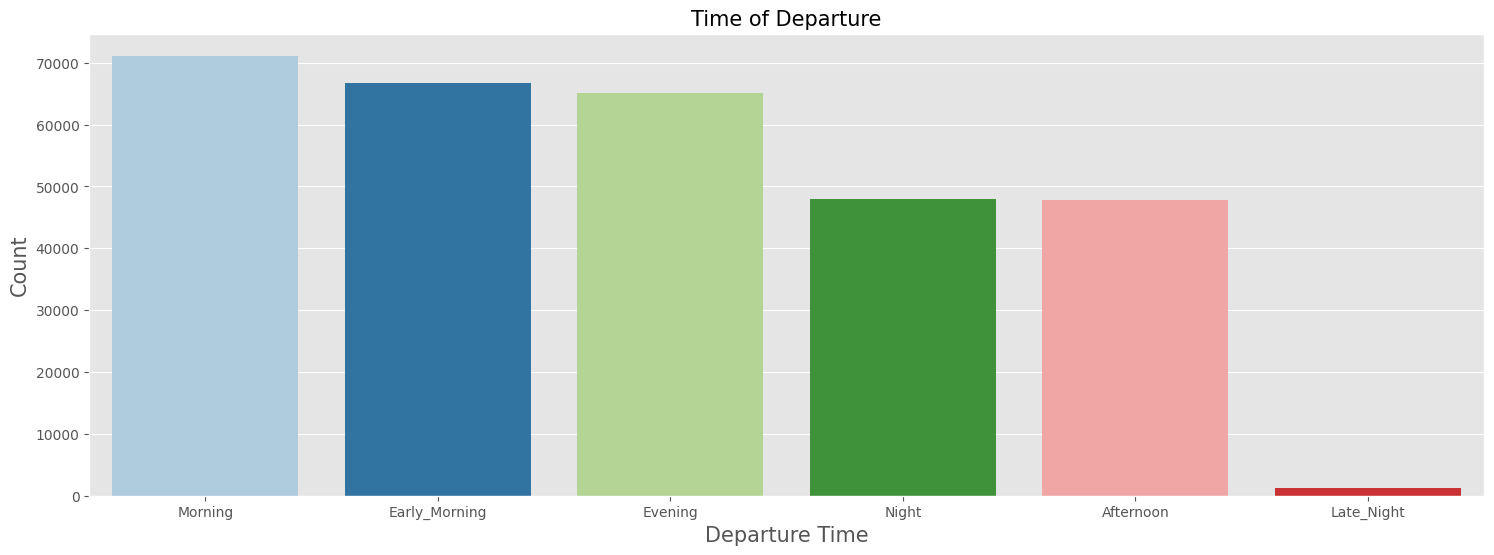

In [19]:
time_counts = df['departure_time'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=time_counts.index, y=time_counts.values, palette='Paired')
plt.title('Time of Departure',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.show()

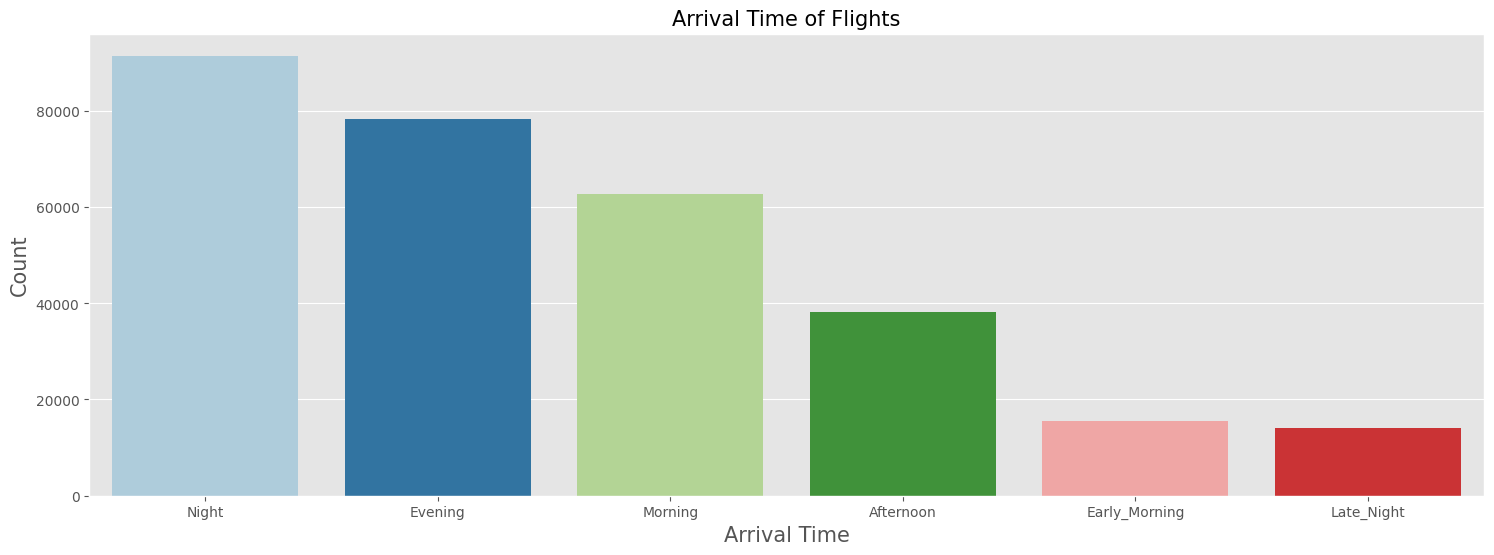

In [20]:
time_counts = df['arrival_time'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=time_counts.index, y=time_counts.values, palette='Paired')
plt.title('Arrival Time of Flights',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

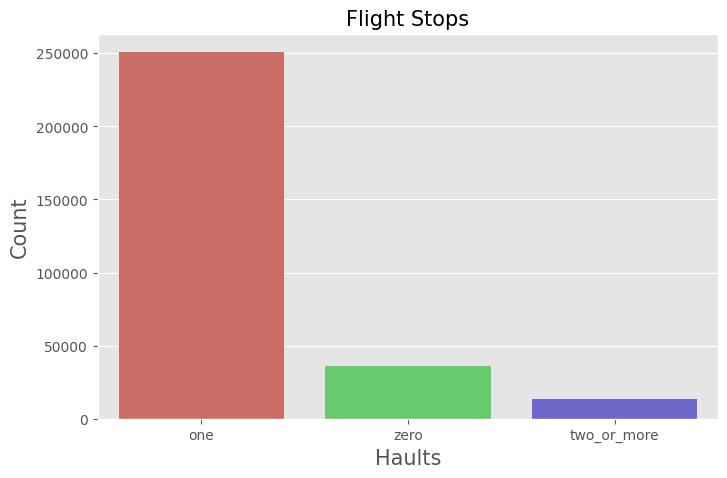

In [21]:
stops_counts = df['stops'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=stops_counts.index, y=stops_counts.values, palette='hls')
plt.title('Flight Stops',fontsize=15)
plt.xlabel('Haults',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<Axes: xlabel='stops', ylabel='price'>

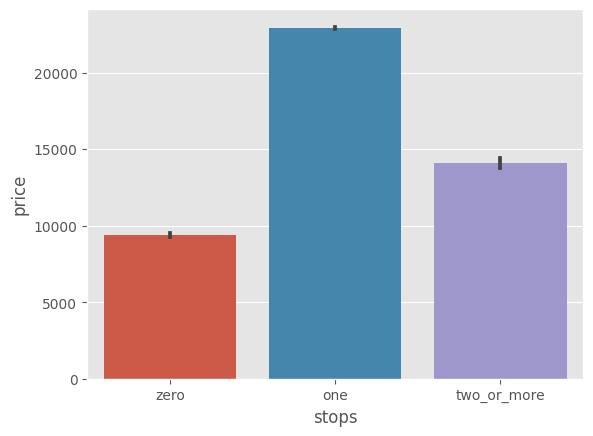

In [22]:
sns.barplot(x = 'stops', y = 'price',data = df)

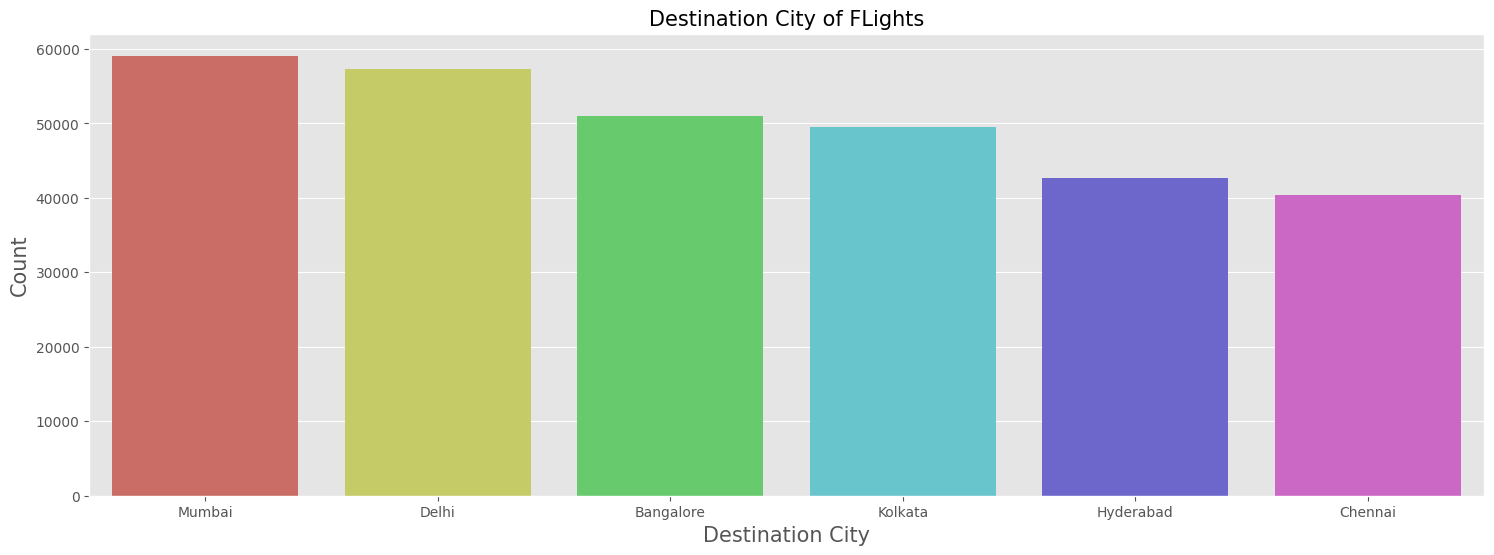

In [23]:
city_counts = df['destination_city'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='hls')
plt.title('Destination City of FLights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

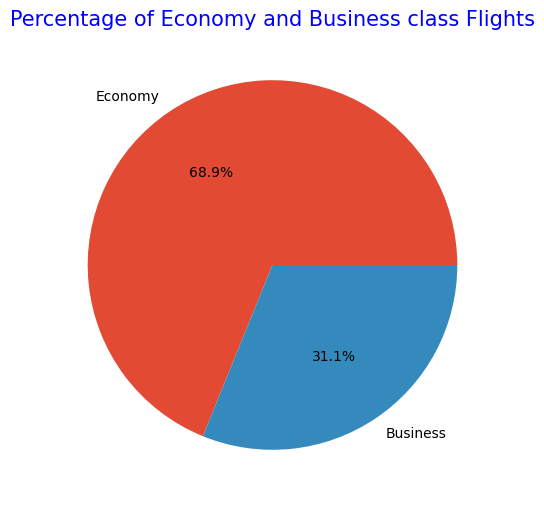

In [24]:
plt.figure(figsize =(10,6))
plt.title('Percentage of Economy and Business class Flights', fontsize=15, color='Blue')
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [25]:
max_duration = df.sort_values(by='duration', ascending=False)
max_duration.duration.head(3)

194359    49.83
193889    49.83
261152    47.75
Name: duration, dtype: float64

In [26]:
max_duration.head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
261152,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Business,47.75,47,55122
119508,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Economy,47.75,47,7461
193926,Vistara,UK-822,Chennai,Morning,one,Morning,Bangalore,Economy,47.08,3,17223
293606,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Business,45.83,6,51928
194141,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Economy,45.83,6,12813
194650,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Economy,45.83,13,12813
197808,Air_India,AI-539,Chennai,Evening,one,Afternoon,Kolkata,Economy,44.50,1,32439
170753,Air_India,AI-840,Hyderabad,Night,one,Afternoon,Kolkata,Economy,42.00,1,33853


***2.2 (B) BIVARIATE ANALYSIS***

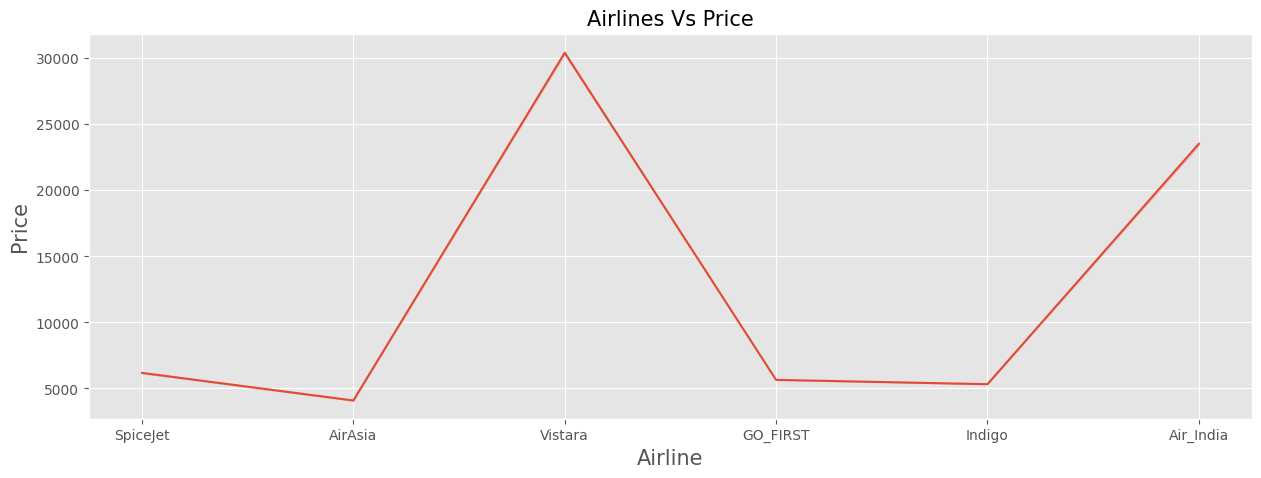

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

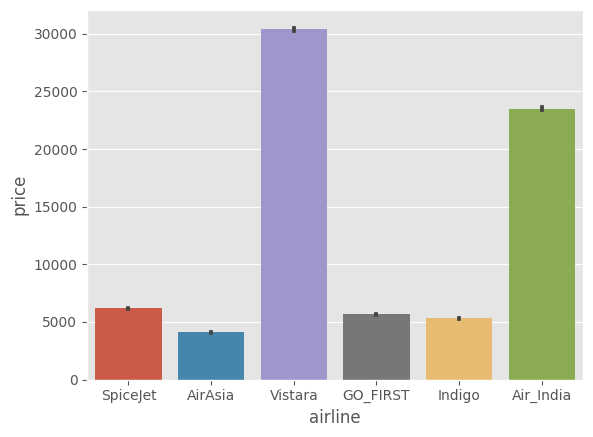

In [28]:
sns.barplot(x='airline', y='price', data=df)

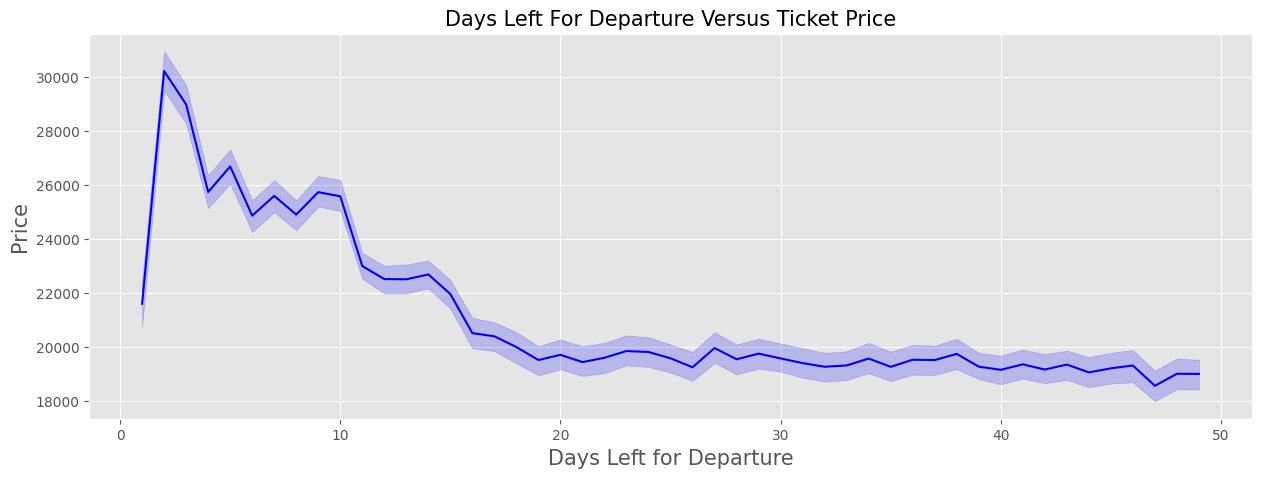

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

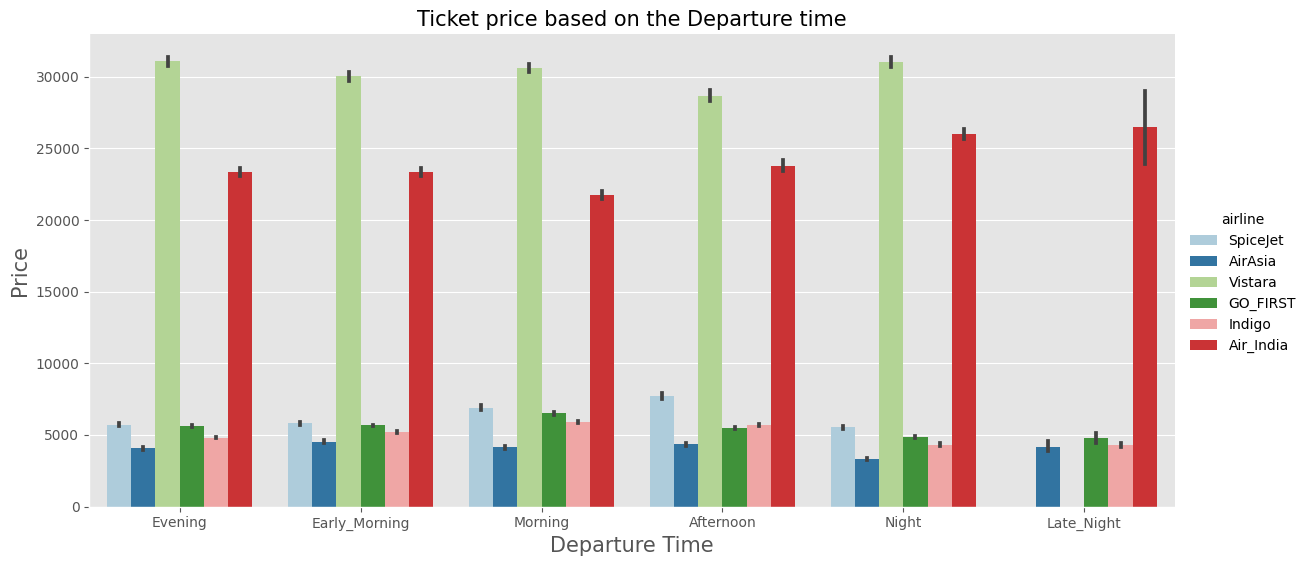

In [30]:
sns.catplot(data=df, kind="bar", x="departure_time", y="price", hue="airline", height=5.5, aspect=12/5.5 ,palette='Paired')
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

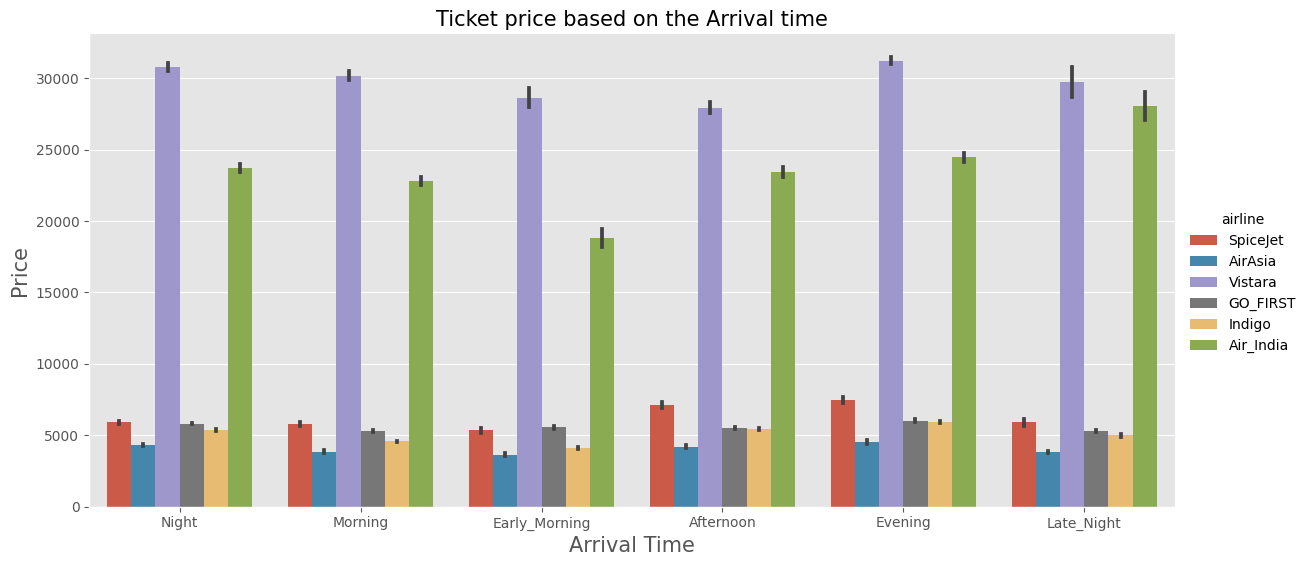

In [31]:
#plt.figure(figsize=(18,6))
sns.catplot(data=df, kind="bar", x="arrival_time", y="price", hue="airline", height=5.5, aspect=12/5.5)
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [32]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


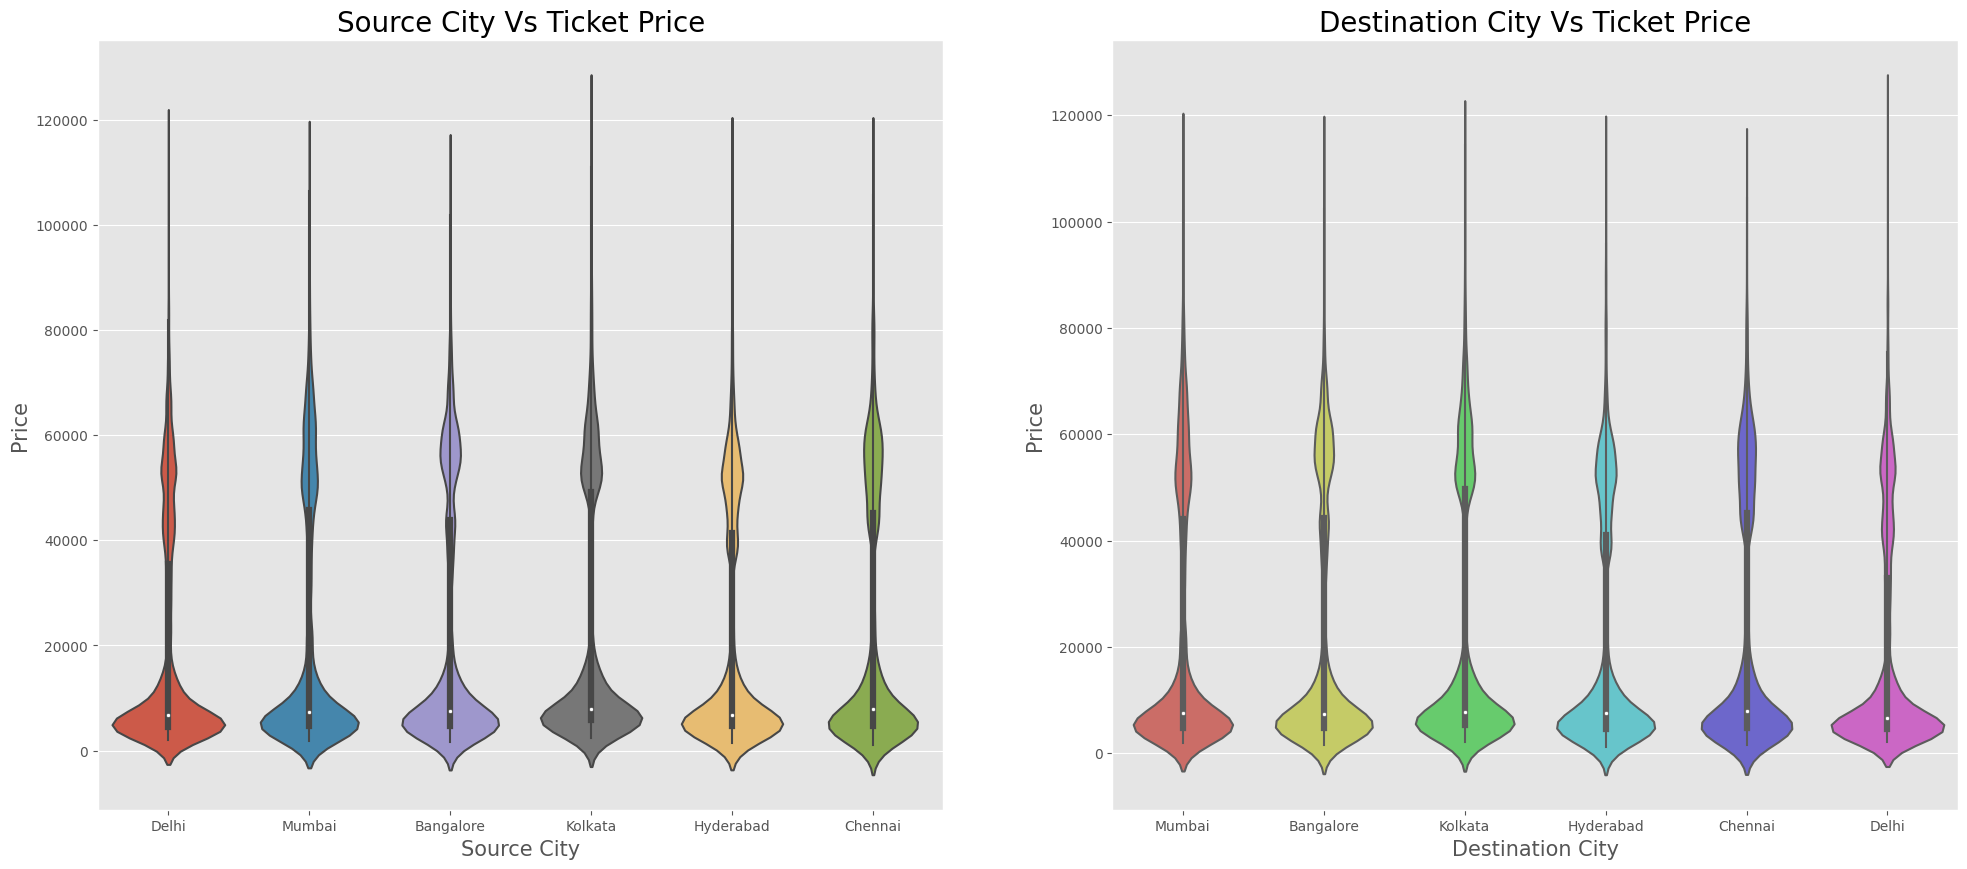

In [33]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.violinplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)

plt.subplot(1,2,2)
sns.violinplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [34]:
class_Ticket_Price = df.groupby(['class'])['price'].mean()

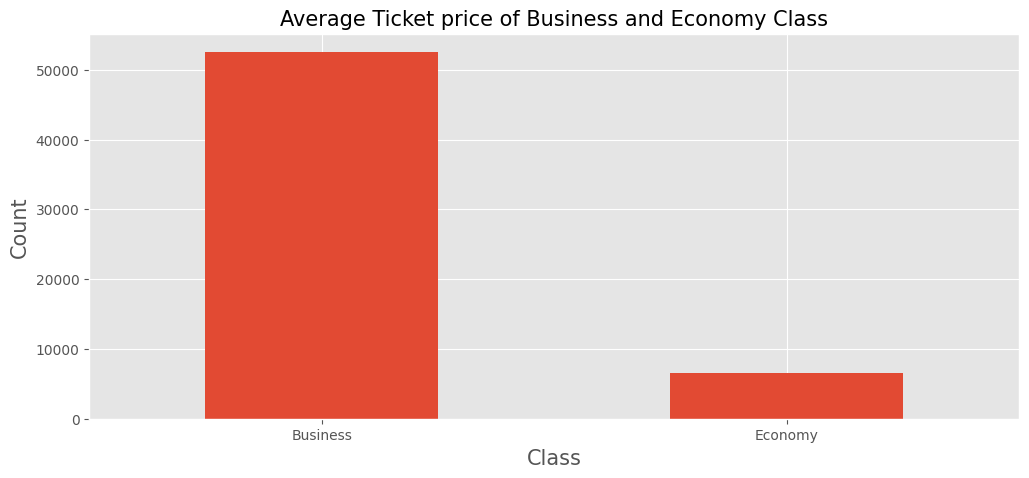

In [35]:
plt.figure(figsize=(12,5))
class_Ticket_Price.plot(kind='bar')
plt.title('Average Ticket price of Business and Economy Class',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Count',fontsize=15)
plt.show()


In [36]:
df.groupby(['airline'])['class'].count()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
Name: class, dtype: int64

**3.MODEL SELECTION AND MODEL TRAINING**

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [38]:
x=df.drop(['price'],axis=1)
y=df['price']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [40]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [41]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
arr = scal.fit_transform(x_train)
x_train1 = pd.DataFrame(arr, columns = x_train.columns)

In [42]:
x_test1 = scal.transform(x_test)

In [43]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [44]:
def get_accuracy(model_name):
    model         = model_name
    model.fit(x_train,y_train)
    y_pred_train  = model.predict(x_train)
    mse_train     = mean_squared_error(y_train,y_pred_train)
    mae_train     = mean_absolute_error(y_train,y_pred_train)
    r2score_train = r2_score(y_train,y_pred_train)
    
    y_pred_test   = model.predict(x_test)
    mse_test      = mean_squared_error(y_test,y_pred_test)
    mae_test      = mean_absolute_error(y_test,y_pred_test)
    r2score_test = r2_score(y_test,y_pred_test)
    
    return print(f"mse_train {mse_train} \nmae_train {mae_train} \nr2score_train {r2score_train} \nmse_test {mse_test} \nmae_test {mae_test} \nr2score_test {r2score_test}")

In [45]:
for model_name,model in [("LinearRegression",LinearRegression()),("DecisionTreeRegressor",DecisionTreeRegressor()),("RandomForestRegressor",RandomForestRegressor()),("KNeighborsRegressor",KNeighborsRegressor())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LinearRegression
mse_train 49170495.59312733 
mae_train 4649.772201668414 
r2score_train 0.9045992290556947 
mse_test 49070241.26461273 
mae_test 4630.295613607948 
r2score_test 0.9046562364171973
None
****************************************************************************************************
DecisionTreeRegressor
mse_train 46490.64797301692 
mae_train 10.541387642169623 
r2score_train 0.9999097986789675 
mse_test 13662301.36578835 
mae_test 1259.0226698946465 
r2score_test 0.9734540691497249
None
****************************************************************************************************
RandomForestRegressor
mse_train 791421.7683826915 
mae_train 333.702401862475 
r2score_train 0.9984644806619284 
mse_test 8219068.474630244 
mae_test 1172.8083584211718 
r2score_test 0.9840303022499884
None
****************************************************************************************************
KNeighborsRegressor
mse_train 8924179.414429983 
mae_train 1431.7987035177314 


**4**. **MODEL** **EVALUATION** 

In [46]:
random_model = RandomForestRegressor()
random_model.fit(x_train1,y_train)

RandomForestRegressor()

***4.1 ACCURACY IN TRAINING TIME***

In [47]:
y_pred_train  = random_model.predict(x_train1)
mse_train     = mean_squared_error(y_train,y_pred_train)
mae_train     = mean_absolute_error(y_train,y_pred_train)
r2score_train = r2_score(y_train,y_pred_train)
print(r2score_train)

0.998468214845454


***4.2 ACCURACY IN TESTING TIME***

In [48]:
y_pred_test  = random_model.predict(x_test1)
mse_test     = mean_squared_error(y_test,y_pred_test)
mae_test     = mean_absolute_error(y_test,y_pred_test)
r2score_test = r2_score(y_test,y_pred_test)
print(r2score_test)

0.9840583147173395
